In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# unscaled, log-normalized counts, with conditions subsampled to the same number of cells 
# and 2000 highly variable genes calculated jointly across all perturbation conditions, including control, using scanpy28 with default parameters (Supplementary Methods)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import string

In [4]:
p = "../evaluation_results/3_nlof/"
outlier_dfs = {f.split(".")[0]: pd.read_csv(os.path.join(p, f)).reset_index(drop=True) for f in os.listdir(p) if "norman" in f}

In [5]:
for dataset in outlier_dfs:
    outlier_dfs[dataset]["Test group"] = dataset.split("_")[2]
    outlier_dfs[dataset]["k"] = dataset.split("_")[3]
    outlier_dfs[dataset]["Local outlier factor"] = -outlier_dfs[dataset]["Negative outlier factor"]

In [6]:
p_vals = dict()
for i, dataset in enumerate(outlier_dfs):
    k = outlier_dfs[dataset]["k"].unique()
    assert len(k) == 1
    k = k[0]
    test_group = outlier_dfs[dataset]["Test group"].unique()
    assert len(test_group) == 1
    test_group = test_group[0]
    
    subset_true = outlier_dfs[dataset][outlier_dfs[dataset]["in matching"] == True]["Local outlier factor"]
    subset_false = outlier_dfs[dataset][outlier_dfs[dataset]["in matching"] == False]["Local outlier factor"]
    p_val = mannwhitneyu(subset_false, subset_true, alternative="greater").pvalue
    p_vals[f"{k},{test_group}"] = p_val

In [7]:
outlier_dfs = {k: outlier_dfs[k] for k in outlier_dfs}
datasets = outlier_dfs.keys()
conc = pd.concat(outlier_dfs)
subsets = conc.groupby("k")

In [8]:
index = {"10": 0, "50": 1, "100": 2}

['10']


/tmp/ipykernel_3697271/3606949476.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["ctrl. vs\nsingle-guide", "ctrl. vs\ndual-guide"])


['100']
['50']


/tmp/ipykernel_3697271/3606949476.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["ctrl. vs\nsingle-guide", "ctrl. vs\ndual-guide"])
/tmp/ipykernel_3697271/3606949476.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["ctrl. vs\nsingle-guide", "ctrl. vs\ndual-guide"])


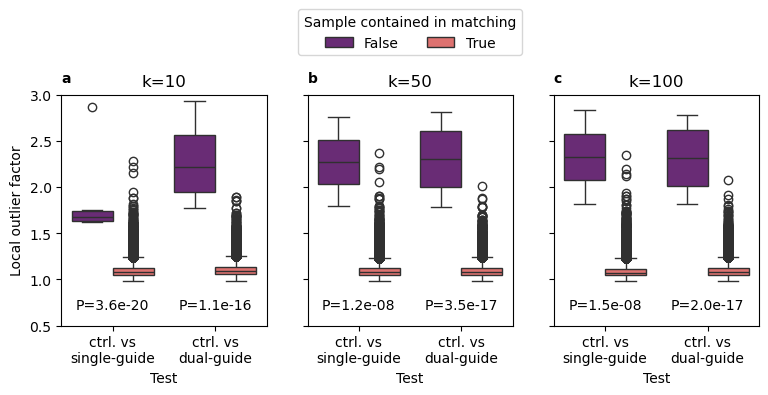

In [9]:
f, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, sharex=True)
labels = string.ascii_lowercase  

for (k, subset) in conc.groupby("k"):
    i = index[k]
    legend = False if i != 1 else "full"
    sns.boxplot(subset, y="Local outlier factor", hue="in matching", x="Test group", palette="magma", ax=axs[i], legend=legend, order=["1", "2"]) 
    print(subset["k"].unique())
    axs[i].set_title(f"k={k}")
    axs[i].set_ylabel("Local outlier factor")
    
    axs[i].set_xticklabels(["ctrl. vs\nsingle-guide", "ctrl. vs\ndual-guide"])
    axs[i].set_xlabel("Test")

    axs[i].set_ylim(top=3, bottom=0.5)
    
    p1 = f"{k},1"
    p2 = f"{k},2"
    axs[i].text(0, 0.65, f"P={p_vals[p1]:.1e}", ha="center", va="bottom", fontsize=10, color="black")
    axs[i].text(1, 0.65, f"P={p_vals[p2]:.1e}", ha="center", va="bottom", fontsize=10, color="black")

    axs[i].text(
        0, 1.1,  # Position (normalized figure coordinates)
        labels[i],   # Corresponding letter
        transform=axs[i].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )

axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, title="Sample contained in matching")
plt.savefig("../plots/fig4/nof.svg", bbox_inches="tight")

In [10]:
p_vals

{'100,1': 1.4876293300775572e-08,
 '100,2': 2.0478283519917996e-17,
 '50,2': 3.510562889128799e-17,
 '10,2': 1.1116782482241197e-16,
 '50,1': 1.2396911083979644e-08,
 '10,1': 3.6294417064316296e-20}